### Association Rules -- Market Basket Analysis

To calculate the association rule using Apriori.

Dataset --> groceries.csv

In [1]:
#Importing the Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/groceries.csv", header = None)
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking for shape and dtype of Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

Inference: (9834,32) and All columns are of object dtypes

### EDA-- Pre-Processing
Using Transaction Encoder to generate a Logical Dataframe

In [4]:
#Converting the Dataframe into a list 
records = []
for i in range(1, 9834):
    records.append([str(Dataset.values[i, j]) for j in range(0, 32)])

In [5]:
#TransactionEncoder
te = TransactionEncoder()
te_try = te.fit(records).transform(records)

In [6]:
#Converting back to DataFrame from TransactionEncoder -- A Logical DataFrame
df = pd.DataFrame(te_try, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Droping NA Column
df_clean = df.drop(['nan'], axis = 1)
df_clean

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# most popular items
count = df_clean.loc[:,:].sum()
count

Instant food products      79
UHT-milk                  328
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               403
white wine                186
whole milk               2426
yogurt                   1338
zwieback                   68
Length: 169, dtype: int64

In [9]:
# Top 10 Popular items
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

whole milk          2426
other vegetables    1862
rolls/buns          1741
soda                1650
yogurt              1338
root vegetables     1060
bottled water       1049
tropical fruit      1028
shopping bags        949
sausage              924
dtype: int64

In [10]:
pop_item = pop_item.to_frame().reset_index()
pop_item

,index,0
0,whole milk,2426
1,other vegetables,1862
2,rolls/buns,1741
3,soda,1650
4,yogurt,1338
5,root vegetables,1060
6,bottled water,1049
7,tropical fruit,1028
8,shopping bags,949
9,sausage,924


In [11]:
#Renaming the columns
pop_item = pop_item.rename(columns = {'index': 'items',0: 'count'})
pop_item

,items,count
0,whole milk,2426
1,other vegetables,1862
2,rolls/buns,1741
3,soda,1650
4,yogurt,1338
5,root vegetables,1060
6,bottled water,1049
7,tropical fruit,1028
8,shopping bags,949
9,sausage,924


<AxesSubplot:xlabel='count', ylabel='items'>

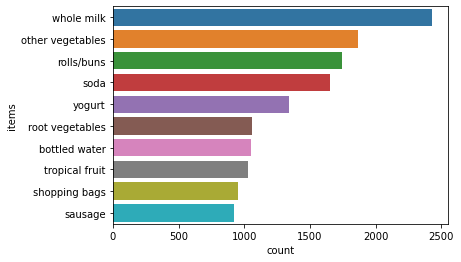

In [12]:
sns.barplot('count','items',data=pop_item)

### Apriori Algorithm 

Association rules with 5% Support and 70% confidence

In [13]:
# min_support -- Support Creterion = 0.05 = 5%
frequent_itemsets = apriori(df_clean, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052375,(beef)
1,0.079020,(bottled beer)
2,0.106682,(bottled water)
3,0.063663,(brown bread)
4,0.054714,(butter)
5,0.076681,(canned beer)
6,0.082579,(citrus fruit)
7,0.057358,(coffee)
8,0.052680,(curd)
9,0.062341,(domestic eggs)


In [14]:
# min_threshold -- Lift Ratio > 0.7
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.189362,0.246720,0.066918,0.353383,1.432325,0.020198,1.164956
1,(whole milk),(other vegetables),0.246720,0.189362,0.066918,0.271228,1.432325,0.020198,1.112334


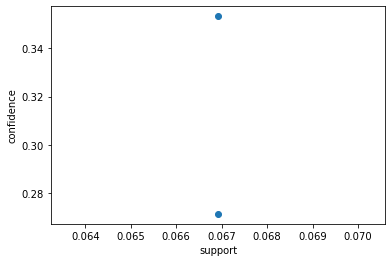

In [15]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### Apriori Algorithm 
Association rules with 1% Support and 80% confidence

In [16]:
# min_support -- Support Creterion = 0.01 = 1%
frequent_itemsets = apriori(df_clean, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033357,(UHT-milk)
1,0.017696,(baking powder)
2,0.052375,(beef)
3,0.033052,(berries)
4,0.025933,(beverages)
...,...,...
238,0.011695,"(other vegetables, whole milk, rolls/buns)"
239,0.015865,"(other vegetables, root vegetables, whole milk)"
240,0.010272,"(other vegetables, whipped/sour cream, whole m..."
241,0.016475,"(other vegetables, yogurt, whole milk)"


In [17]:
# min_threshold -- Lift Ratio > 0.8
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.189362,0.052375,0.013831,0.073040,1.394563,0.003913,1.022293
1,(beef),(other vegetables),0.052375,0.189362,0.013831,0.264078,1.394563,0.003913,1.101526
2,(root vegetables),(beef),0.107800,0.052375,0.014136,0.131132,2.503731,0.008490,1.090644
3,(beef),(root vegetables),0.052375,0.107800,0.014136,0.269903,2.503731,0.008490,1.222029
4,(whole milk),(beef),0.246720,0.052375,0.014238,0.057708,1.101834,0.001316,1.005660
...,...,...,...,...,...,...,...,...,...
311,"(yogurt, rolls/buns)",(whole milk),0.029594,0.246720,0.010678,0.360825,1.462485,0.003377,1.178518
312,"(whole milk, rolls/buns)",(yogurt),0.044442,0.136072,0.010678,0.240275,1.765785,0.004631,1.137158
313,(yogurt),"(whole milk, rolls/buns)",0.136072,0.044442,0.010678,0.078475,1.765785,0.004631,1.036931
314,(whole milk),"(yogurt, rolls/buns)",0.246720,0.029594,0.010678,0.043281,1.462485,0.003377,1.014306


In [18]:
#Sorting The Rules.
rules.sort_values('lift',ascending = True)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
259,(whole milk),(shopping bags),0.246720,0.096512,0.019424,0.078730,0.815760,-0.004387,0.980699
258,(shopping bags),(whole milk),0.096512,0.246720,0.019424,0.201264,0.815760,-0.004387,0.943090
229,(rolls/buns),(tropical fruit),0.177057,0.104546,0.015560,0.087881,0.840593,-0.002951,0.981729
228,(tropical fruit),(rolls/buns),0.104546,0.177057,0.015560,0.148833,0.840593,-0.002951,0.966841
12,(bottled beer),(whole milk),0.079020,0.246720,0.016475,0.208494,0.845063,-0.003021,0.951705
13,(whole milk),(bottled beer),0.246720,0.079020,0.016475,0.066777,0.845063,-0.003021,0.986881
181,(other vegetables),(pastry),0.189362,0.087867,0.014238,0.075188,0.855698,-0.002401,0.986290
180,(pastry),(other vegetables),0.087867,0.189362,0.014238,0.162037,0.855698,-0.002401,0.967391
169,(newspapers),(other vegetables),0.077596,0.189362,0.012916,0.166448,0.878993,-0.001778,0.972510
168,(other vegetables),(newspapers),0.189362,0.077596,0.012916,0.068206,0.878993,-0.001778,0.989923


In [19]:
# Fetching Rules which have Lift ratio great then 1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.189362,0.052375,0.013831,0.073040,1.394563,0.003913,1.022293
1,(beef),(other vegetables),0.052375,0.189362,0.013831,0.264078,1.394563,0.003913,1.101526
2,(root vegetables),(beef),0.107800,0.052375,0.014136,0.131132,2.503731,0.008490,1.090644
3,(beef),(root vegetables),0.052375,0.107800,0.014136,0.269903,2.503731,0.008490,1.222029
4,(whole milk),(beef),0.246720,0.052375,0.014238,0.057708,1.101834,0.001316,1.005660
...,...,...,...,...,...,...,...,...,...
311,"(yogurt, rolls/buns)",(whole milk),0.029594,0.246720,0.010678,0.360825,1.462485,0.003377,1.178518
312,"(whole milk, rolls/buns)",(yogurt),0.044442,0.136072,0.010678,0.240275,1.765785,0.004631,1.137158
313,(yogurt),"(whole milk, rolls/buns)",0.136072,0.044442,0.010678,0.078475,1.765785,0.004631,1.036931
314,(whole milk),"(yogurt, rolls/buns)",0.246720,0.029594,0.010678,0.043281,1.462485,0.003377,1.014306


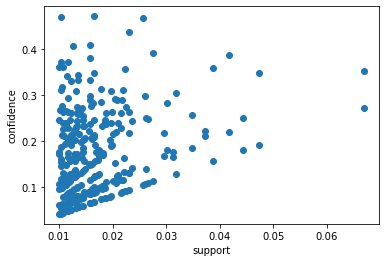

In [20]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()